In [1]:
# import gym
# import numpy as np
# import math
# from collections import deque


# class MountainCarAgent():
#     def __init__(self, buckets=(4, 2), num_episodes=300, min_lr=0.1, min_explore=0.2, discount=0.9, decay=25, n_step=100, early_stopping_threshold=15):
#         self.early_stopping_threshold = early_stopping_threshold
#         self.buckets = buckets
#         self.num_episodes = num_episodes
#         self.min_lr = min_lr
#         self.min_explore = min_explore
#         self.discount = discount
#         self.decay = decay
#         self.n_step = n_step
#         self.env = gym.make('MountainCar-v0')
#         self.upper_bounds = [self.env.observation_space.high[0], self.env.observation_space.high[1]]
#         self.lower_bounds = [self.env.observation_space.low[0], self.env.observation_space.low[1]]
#         self.Q_table = np.zeros(self.buckets + (self.env.action_space.n,))
#         self.N = np.zeros(self.buckets + (self.env.action_space.n,))
    
#     # Rest of the class code remains unchanged.

#     def get_explore_rate(self, t):
#         return max(self.min_explore, min(1., 1. - math.log10((t + 1) / self.decay)))

#     def get_lr(self, t):
#         return max(self.min_lr, min(1., 1. - math.log10((t + 1) / self.decay)))

#     def mc_update(self, current_state, new_state, reward, old_action, action,i):
#         q = self.Q_table[current_state][old_action]
#         q += (1/i)*(reward - q)
#         self.Q_table[current_state][old_action] = q
 
#     def sarsa_update(self, current_state, new_state, reward, old_action, action,i):
#         q = self.Q_table[current_state][old_action]
#         q += self.lr*(reward+self.discount*self.Q_table[new_state][action] - q)
#         self.Q_table[current_state][old_action] = q

#     def ql_update(self, current_state, new_state, reward, old_action, action,i):
#         q = self.Q_table[current_state][old_action]
#         q += self.lr*(reward+self.discount*np.max(self.Q_table[new_state]) - q)
#         self.Q_table[current_state][old_action] = q
            
#     def expected_sarsa_update(self, current_state, new_state, reward, old_action, action, i):
#         q = self.Q_table[current_state][old_action]
        
#         # Create a policy using the current Q-table
#         policy = np.ones(self.env.action_space.n) * self.explore_rate / self.env.action_space.n
        
#         best_action = np.argmax(self.Q_table[new_state])
        
#         policy[best_action] += (1.0 - self.explore_rate)
#         # Calculate the expected value
        
#         expected_value = np.sum(policy * self.Q_table[new_state])
#         # Calculate the new Q-value
        
#         q += self.lr*(reward + self.discount * expected_value - q)
#         self.Q_table[current_state][old_action] = q
        
        

#     def off_policy_expected_sarsa_update(self, current_state, new_state, reward, old_action, i):
#         q = self.Q_table[current_state][old_action]
        
#         # Create a greedy policy using the current Q-table
#         policy = np.zeros(self.env.action_space.n)
        
#         best_action = np.argmax(self.Q_table[new_state])
        
#         policy[best_action] = 1.0
#         # Calculate the expected value
#         expected_value = np.sum(policy * self.Q_table[new_state])
        
#         # Calculate the new Q-value
#         q += self.lr * (reward + self.discount * expected_value - q)
#         self.Q_table[current_state][old_action] = q


        
#     def choose_action(self, state):
#         x = (np.random.uniform(0, 1))
#         if  x < self.explore_rate:
#             return self.env.action_space.sample()
#         else:
#             return np.argmax(self.Q_table[state])
        

#     def discretize_state(self, obs):
#         discretized = list()
#         for i in range(len(obs)):
#             scaling = (obs[i] + abs(self.lower_bounds[i])) / (self.upper_bounds[i] - self.lower_bounds[i])
#             new_obs = int(np.round((self.buckets[i] - 1) * scaling))
#             new_obs = min(self.buckets[i] - 1, max(0, new_obs))
#             discretized.append(new_obs)
#         return tuple(discretized)
    
#     def n_step_sarsa_update(self, current_state, new_state, reward, old_action, action, steps):
#         self.N[current_state][old_action] += 1

#         if steps < self.n_step:
#             return
        
#         ### Note that popleft() both returns and removes the leftmost item from the deque,
#         ###so this code is both accessing and removing the entries after they've been used. 
#         ### The "mod n+1" behavior is implicit in this design.

#         returns = sum(self.discount**i * self.rewards[i] for i in range(self.n_step))
#         returns += self.discount**self.n_step * self.Q_table[new_state][action]

        
#         old_state, old_action = self.state_actions.popleft()
#         q = self.Q_table[old_state][old_action]
#         q += self.lr * (returns - q)
#         self.Q_table[old_state][old_action] = q

#     def train(self, method='mc'):
#         losses = []
#         win_counter = 0 
#         for i, e in enumerate(range(self.num_episodes)):
#             if i%100==0: 
#                 print(f"episode: {i}")
#                 print(f"self.Q_table:{self.Q_table}")
                
#             i += 1
#             total_R = 0
#             current_state = self.discretize_state(self.env.reset(options={(-0.6,-0.4), 0})[0])
            
#             if i%100==0: 
#                 print(f"current state:{current_state}")
                
#             self.lr = self.get_lr(e)
#             self.explore_rate = self.get_explore_rate(e)
#             terminated, truncated, position, end = False,False,False,False
#             old_action = 1
#             steps = 0

#             # Added for n-step SARSA
            
#             ###The 'tau' from the n-step SARSA algorithm is not explicitly represented in this code. 
#             ###Instead, the dequeues self.rewards and self.state_actions keep track of the last 'n' rewards
#             ### and state-action pairs.
#             ###The variable 'steps' in the train function essentially acts as the time 't' from 
#             ###the n-step SARSA algorithm.
            
#             self.rewards = deque(maxlen=self.n_step)
#             self.state_actions = deque(maxlen=self.n_step)

#             while not any([terminated, truncated, position, end]):
#                 steps += 1
#                 end = steps == num_steps_in_episode
#                 ## agent selects an action (A_t) based on the current state, executes that action in the environment, 
#                 # and observes the resulting reward and new state. 
#                 action = self.choose_action(current_state)
#                 obs, reward, terminated, truncated, _ = self.env.step(action)
                
#                 position = obs[0] >= 0.5
#                 new_state = self.discretize_state(obs)
                
#                 self.rewards.append(reward)
#                 self.state_actions.append((current_state, action))
                
#                 total_R += reward

#                 if method == 'n_step_sarsa':
#                     self.n_step_sarsa_update(current_state, new_state, total_R, old_action, action, steps)
                    
#                 current_state = new_state
#                 old_action = action
#             losses.append(total_R)
            
#             if position == True:
#                 win_counter += 1  # Increment win counter
#                 print('At episode: ', e, ', Win!!!', sep='')
#                 if win_counter == self.early_stopping_threshold:  # Check win counter
#                     print(f'Agent has won {self.early_stopping_threshold} times! Stopping training...')
#                     break
                    
# #             if position == True:
# #                 print('At episode: ', e, ', Win!!!', sep='')

#         print('Finished training!')
#         return losses


#     def run(self):
       
#         self.env = gym.make('MountainCar-v0', render_mode='human')
#         current_state = self.discretize_state(self.env.reset(options={(-0.6,-0.4), 0})[0])
#         steps=0
#         termintated, truncated, position, end = False,False,False,False
#         while not any([termintated, truncated, position, end]):
#             steps+=1
#             end = steps==num_steps_in_episode
#             action = self.choose_action(current_state)
# #             print(action)
#             obs, reward, termintated, truncated, _ = self.env.step(action)
#             position = obs[0]>=0.5
#             current_state = self.discretize_state(obs)
#         if position == True:
#             print('Win!!!')
            
#         self.env.close()

        


### N-Step SARSA

<img src="on-policy-sarsa.png" width="500"/>


episode: 0
self.Q_table:[[[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]]
current state:(1, 0)
episode: 100
self.Q_table:[[[ -9.8711741   -7.8645876   -5.28694246]
  [ -6.42743392  -7.8645876    0.        ]]

 [[ -9.99999848  -9.99998901  -9.99989721]
  [-10.         -10.         -10.        ]]

 [[ -9.99999592  -9.99999379  -9.99999991]
  [ -9.99999782  -9.99999992  -9.99999999]]

 [[  0.           0.           0.        ]
  [  0.           0.           0.        ]]]
At episode: 166, Win!!!
At episode: 186, Win!!!
At episode: 192, Win!!!
current state:(1, 0)
episode: 200
self.Q_table:[[[ -9.95568834  -9.95151227  -9.97041517]
  [ -6.42743392  -7.8645876   -8.90407755]]

 [[-10.         -10.         -10.        ]
  [-10.         -10.         -10.        ]]

 [[ -9.99999999  -9.99999988 -10.        ]
  [ -9.99998987  -9.9999939   -9.99997934]]

 [[  0.           0.           0.        ]
  [  0.           0.           0.      

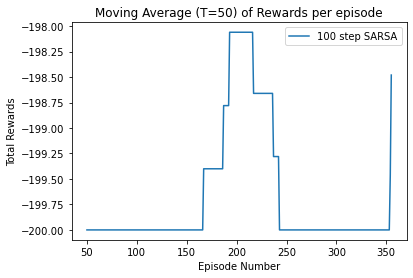

In [2]:

        
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from nstep_sarsa_agent import MountainCarAgent


def moving_average(arr, window_size=10):
    ret = np.cumsum(arr, dtype=float)
    ret[window_size:] = ret[window_size:] - ret[:-window_size]
    return ret[window_size - 1:] / window_size


TD_N= 100

# num_steps_in_episode =2000

agent_n_step_sarsa = MountainCarAgent(num_episodes = 500, early_stopping_threshold=5, num_steps_in_episode=2000)

losses_n_step_sarsa = agent_n_step_sarsa.train(method='n_step_sarsa')

agent_n_step_sarsa.run()


ma_losses_n_step_sarsa = moving_average(losses_n_step_sarsa, window_size=50)
x= np.arange(0,len(ma_losses_n_step_sarsa))

x = [x+50 for x in x]
plt.plot(x, ma_losses_n_step_sarsa, label=f'{TD_N} step SARSA')

plt.title("Moving Average (T=50) of Rewards per episode")
plt.xlabel("Episode Number")
plt.ylabel("Total Rewards")
plt.legend()

log_df = pd.DataFrame({'rewards':ma_losses_n_step_sarsa})
log_df['method'] = f'{TD_N} step SARSA'
log_df.to_csv(f"MountainCar_{TD_N}_step_sarsa.csv")

In [3]:
break 

SyntaxError: 'break' outside loop (371449011.py, line 1)

### Combinations of parameters that worked: 

<img src="TD(100).png" width="500"/>


{'buckets': (4, 2), 'num_episodes': 500, 'min_lr': 0.1, 'min_explore': 0.1, 'discount': 0.9, 'decay': 25, 'n_step': 100, 'env': <TimeLimit<OrderEnforcing<PassiveEnvChecker<MountainCarEnv<MountainCar-v0>>>>>, 'upper_bounds': [0.6, 0.07], 'lower_bounds': [-1.2, -0.07], 'Q_table': array([[[ -9.99450167,  -9.99160768,  -9.99303862],
        [ -9.96132003,  -9.87478488,  -9.87694384]],

       [[ -9.99999961,  -9.99999973,  -9.9999997 ],
        [-10.        , -10.        ,  -9.99999999]],

       [[ -9.9999986 ,  -9.99999904,  -9.99999997],
        [ -9.99999442,  -9.99999275,  -9.99998366]],

       [[ -2.71      ,   0.        ,  -1.        ],
        [ -4.68556344,  -4.68548123,  -6.86189404]]]), 'N': array([[[5.8700e+02, 1.0430e+03, 1.1120e+03],
        [4.8500e+02, 9.2400e+02, 1.3240e+03]],

       [[2.3442e+04, 1.1459e+04, 7.0120e+03],
        [9.7270e+03, 1.0416e+04, 1.5635e+04]],

       [[2.2220e+03, 1.5940e+03, 7.6700e+02],
        [9.2900e+02, 1.9670e+03, 4.6540e+03]],

       [[1.7700e+02, 5.7000e+01, 9.0000e+00],
        [4.1600e+02, 3.9600e+02, 1.8200e+02]]]), 'lr': 0.1, 'explore_rate': 0.1, 'rewards': deque([-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0], maxlen=100), 'state_actions': deque([((1, 0), 0), ((1, 0), 0), ((1, 0), 0), ((1, 0), 0), ((1, 0), 0), ((1, 0), 1), ((0, 0), 1), ((0, 0), 1), ((0, 0), 1), ((0, 0), 1), ((0, 0), 1), ((0, 0), 1), ((0, 0), 1), ((0, 0), 1), ((0, 0), 0), ((0, 0), 1), ((0, 0), 1), ((0, 0), 1), ((0, 0), 1), ((0, 1), 1), ((0, 1), 1), ((0, 1), 1), ((0, 1), 1), ((0, 1), 1), ((0, 1), 1), ((0, 1), 2), ((0, 1), 1), ((0, 1), 1), ((0, 1), 1), ((0, 1), 1), ((1, 1), 1), ((1, 1), 1), ((1, 1), 1), ((1, 1), 1), ((1, 1), 1), ((1, 1), 1), ((1, 1), 1), ((1, 1), 2), ((1, 1), 1), ((1, 1), 0), ((1, 1), 2), ((1, 1), 1), ((1, 1), 1), ((1, 1), 1), ((1, 1), 1), ((2, 1), 1), ((2, 1), 1), ((2, 1), 1), ((2, 1), 1), ((2, 1), 1), ((2, 1), 1), ((2, 1), 2), ((2, 1), 1), ((2, 1), 1), ((2, 1), 1), ((2, 1), 1), ((2, 1), 1), ((2, 1), 1), ((2, 1), 1), ((2, 1), 1), ((2, 1), 1), ((2, 1), 1), ((2, 1), 1), ((2, 0), 1), ((2, 0), 0), ((2, 0), 1), ((2, 0), 1), ((2, 0), 1), ((2, 0), 1), ((2, 0), 1), ((2, 0), 1), ((2, 0), 1), ((2, 0), 1), ((2, 0), 2), ((2, 0), 1), ((2, 0), 1), ((2, 0), 1), ((2, 0), 1), ((2, 0), 1), ((1, 0), 0), ((1, 0), 0), ((1, 0), 0), ((1, 0), 0), ((1, 0), 0), ((1, 0), 0), ((1, 0), 0), ((1, 0), 0), ((1, 0), 0), ((1, 0), 0), ((1, 0), 0), ((1, 0), 0), ((1, 0), 0), ((0, 0), 1), ((0, 0), 1), ((0, 0), 1), ((0, 0), 1), ((0, 0), 1), ((0, 0), 1), ((0, 0), 1)], maxlen=100)}
    
    

In [ ]:
print(vars(agent_n_step_sarsa))

In [8]:
import os
method_comparison = [x for x in os.listdir() if 'MountainCar' in x and '.csv' in x and'step_sarsa' in x]
method_comparison = ['MountainCar_100_step_sarsa.csv',
 'MountainCar_3_step_sarsa.csv',
 'MountainCar_4_step_sarsa.csv',
 'MountainCar_2_step_sarsa.csv',
 'MountainCar_0_step_sarsa.csv']

Text(0, 0.5, 'Total Rewards')

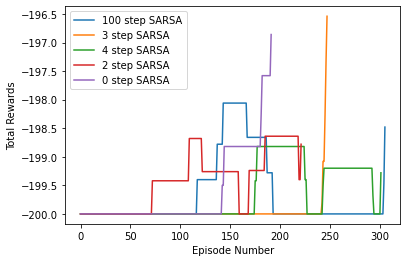

In [9]:

for i in range(0,len(method_comparison)): 
    temp_df = pd.read_csv(method_comparison[i])
    plt.plot(temp_df.index, temp_df['rewards'], label = f"{temp_df['method'].iloc[i]}")
plt.legend()
plt.xlabel("Episode Number")
plt.ylabel("Total Rewards")